This notebooks is for working with Dense Neural Network.

## 4. Preprocessing

In [601]:
import pandas as pd
import matplotlib.pyplot as plt

Let's read the pre-porcessed data.

In [602]:
network_df2=pd.read_csv('network_preprocessed.csv')

In [603]:
network_df2.shape

(2160668, 23)

### 4.1 Split the dataset into train and test

In [604]:
network_df2.head()

X=network_df2.drop(columns='PKT_CLASS')
y=network_df2['PKT_CLASS']

In [605]:
X.head()

,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,...,LAST_PKT_RESEVED,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
0,1540,1,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,...,50.021920,0,0,1,1,0,0,0,0,1
1,1540,1,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,...,50.030211,0,0,1,0,1,0,1,0,0
2,55,1,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,...,50.060221,0,0,0,0,0,1,1,0,0
3,55,1,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,...,50.060098,0,0,0,0,0,1,1,0,0
4,55,1,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,...,50.061864,0,0,0,0,0,1,1,0,0


In [606]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [607]:
X_train

,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,...,LAST_PKT_RESEVED,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
1705294,55,1,2,13666,16091,0.000000,328.297902,18056.4,0.008440,0.000000,...,50.043427,0,0,0,0,0,1,1,0,0
1530070,1540,1,13,14142,16103,0.000627,328.491489,505876.0,0.236498,0.001477,...,50.021057,0,0,1,1,0,0,0,0,1
966649,1540,1,4,882,16091,0.000000,328.240918,505490.0,0.236321,0.000000,...,50.021920,0,0,1,0,0,1,0,0,0
348199,65535,1,0,-1,210,0.005243,23.188498,1519660.0,0.131248,0.056214,...,9.056214,0,1,0,0,1,0,1,0,0
374424,1000,1,21,1990,6250,0.000000,124.944425,124944.0,0.059605,0.000131,...,75.022240,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145968,1000,1,39,5358,6250,0.000640,124.941028,124941.0,0.059605,0.001360,...,75.023600,1,0,0,1,0,0,0,0,1
178052,55,1,16,1106,16092,0.000000,328.206042,18051.3,0.008441,0.000000,...,50.060221,0,0,0,0,0,0,0,0,1
711599,1000,1,33,2166,6250,0.000229,124.943426,124943.0,0.059605,0.000389,...,75.022640,1,0,0,0,1,0,1,0,0
787114,1500,1,37,2028,9108,0.000360,1016.430848,1524650.0,0.130291,0.031200,...,9.960767,1,0,0,1,0,0,0,0,1


 ### 4.2 Balance the target class using Under Sampling

As undersampling and oversampling showed similar performance for Logistic Regression and XGBoost, we decided to use undersampling to work with 
Dense Neural Network.

In [608]:
from imblearn.under_sampling import RandomUnderSampler

# Define the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Fit and apply the undersampler to the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
# Now X_train_resampled and y_train_resampled contain the balanced dataset

### 4.3 Feature Scaling

In [609]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_resampled)

# Transform both the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler fitted on X_train


## 5.Modelling With Neural Network

In [182]:
y_train.shape

(1728534,)

In [629]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [637]:
# Create a new sequential model
model = keras.Sequential()

# Add input layer with 22 features
model.add(Dense(32, input_dim=22, activation='tanh'))


# Declare the hidden layers (5 layers with 32 nodes each)
for i in range (0, 5):
    model.add(layers.Dense(32, activation="tanh"))
    model.add(layers.Dropout(0.3)) # Set 30% of the nodes to 0.
    model.add(layers.BatchNormalization()) 

# Declare the output layer
model.add(layers.Dense(1, activation="relu"))

In [638]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored metric

In [639]:
import time
start = time.time()
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy', 
              metrics=[keras.metrics.BinaryAccuracy(),
                       keras.metrics.Recall()]
             )

# fit model
history = model.fit(X_train_scaled, 
                    y_train_resampled,
                    batch_size=128, #batch processing
                    validation_data=(X_test_scaled, y_test), 
                    epochs=10, 
                    verbose=1,
                    callbacks=[early_stopping], #early stopping
                    workers=-1, 
                    use_multiprocessing=True)

end = time.time()

print (end-start, "seconds")

Epoch 1/10
2809/2809 [==============================] - 10s 3ms/step - loss: 1.2460 - binary_accuracy: 0.9066 - recall_109: 0.8516 - val_loss: 0.3595 - val_binary_accuracy: 0.9764 - val_recall_109: 0.8761
Epoch 2/10
2809/2809 [==============================] - 9s 3ms/step - loss: 1.0599 - binary_accuracy: 0.9280 - recall_109: 0.8725 - val_loss: 0.2729 - val_binary_accuracy: 0.9820 - val_recall_109: 0.8752
Epoch 3/10
2809/2809 [==============================] - 8s 3ms/step - loss: 1.0230 - binary_accuracy: 0.9321 - recall_109: 0.8720 - val_loss: 0.2593 - val_binary_accuracy: 0.9830 - val_recall_109: 0.8750
Epoch 4/10
2809/2809 [==============================] - 8s 3ms/step - loss: 1.0039 - binary_accuracy: 0.9341 - recall_109: 0.8720 - val_loss: 0.2133 - val_binary_accuracy: 0.9861 - val_recall_109: 0.8745
Epoch 5/10
2809/2809 [==============================] - 8s 3ms/step - loss: 0.9974 - binary_accuracy: 0.9350 - recall_109: 0.8717 - val_loss: 0.2247 - val_binary_accuracy: 0.9854 - va

In [640]:
# evaluate the model
train_acc = model.evaluate(X_train_scaled, y_train_resampled, verbose=1)
test_acc = model.evaluate(X_test_scaled, y_test, verbose=1)

13505/13505 [==============================] - 9s 675us/step - loss: 0.2108 - binary_accuracy: 0.9863 - recall_109: 0.8745


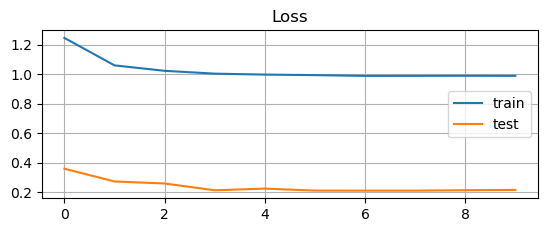

In [641]:
import matplotlib.pyplot as plt
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

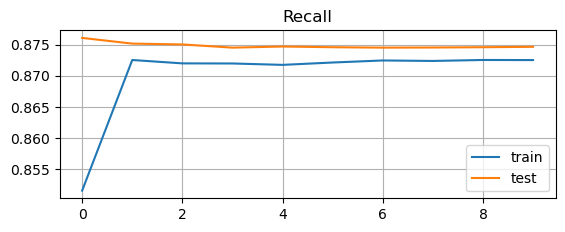

In [645]:
# plot accuracy during training
plt.subplot(212)
plt.title('Recall')
plt.plot(history.history['recall_109'], label='train')
plt.plot(history.history['val_recall_109'], label='test')
plt.legend()
plt.grid()
plt.show()

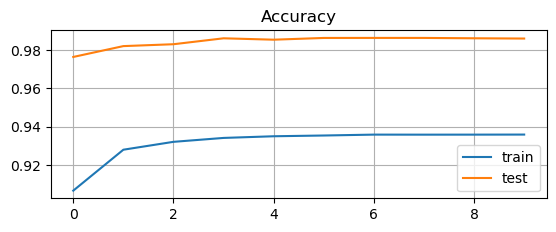

In [646]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

In [648]:
# Evaluate the network
train_accuracy = history.history['binary_accuracy'][-1]
test_accuracy = history.history['val_binary_accuracy'][-1]

train_recall = history.history['recall_109'][-1]
test_recall = history.history['val_recall_109'][-1]

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(f"Train Recall: {test_recall:4f}")
print(f"Test Recall: {test_recall:4f}")

Train Accuracy: 0.9359
Test Accuracy: 0.9860
Train Recall: 0.874638
Test Recall: 0.874638


In [649]:
# Assuming you have calculated the metrics_train list or array

# Assigning to a list
metrics = [train_accuracy, test_accuracy, train_recall, test_recall]
metrics

[0.9358670115470886,
 0.9859927892684937,
 0.8725127577781677,
 0.8746384382247925]

In [650]:
# Creating a DataFrame with the metrics_train list and setting the index
metrics_df = pd.DataFrame([metrics], columns=["Train Accuracy","Test Accuracy", "Train Recall", "Test Recall"],index=["Dense_Network"])

# Printing the DataFrame
print(metrics_df)

               Train Accuracy  Test Accuracy  Train Recall  Test Recall
Dense_Network        0.935867       0.985993      0.872513     0.874638


In [651]:
metrics_df.to_csv('Dense_Network.csv')

The evaluation results were exported into the CSV file for further analysis.